# Diagnóstico de Nuemonia utilizando redes neuronales.

### Densely Connected Convolutional Neural Network

Fundación Fulgor.

Axel Aguerreberry.

In [1]:
# /home/axel/DATASETS/chest_xray

In [2]:
import tensorflow as tf
import timeit

In [3]:
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


In [6]:
from sklearn.metrics import confusion_matrix

In [7]:
import matplotlib.pyplot as plt

In [20]:
import random
from sklearn.utils import shuffle
import math

In [9]:
import keras

Using TensorFlow backend.


In [10]:
import pandas as pd 
import cv2                 
import numpy as np         
import os                  
from random import shuffle
from tqdm import tqdm  
import scipy
import skimage
from skimage.transform import resize
print(os.listdir("/home/axel/DATASETS/chest_xray"))

['test', 'train', 'val', '.DS_Store']


In [11]:
print(os.listdir("/home/axel/DATASETS/chest_xray/train/"))

['.DS_Store', 'NORMAL', 'PNEUMONIA']


In [12]:
TRAIN_DIR = "/home/axel/DATASETS/chest_xray/train/"
TEST_DIR =  "/home/axel/DATASETS/chest_xray/test/"

**Obtención de Imágenes y Labels.**

In [13]:
def get_data(Dir):
    X = []
    y = []
    for nextDir in os.listdir(Dir):
        if not nextDir.startswith('.'):
            if nextDir in ['NORMAL']:
                label = 0
            elif nextDir in ['PNEUMONIA']:
                label = 1
            else:
                label = 2
                
            temp = Dir + nextDir
                
            for file in tqdm(os.listdir(temp)):
                img = cv2.imread(temp + '/' + file)
                if img is not None:
                    img = skimage.transform.resize(img, (150, 150, 3))
                    #img_file = scipy.misc.imresize(arr=img_file, size=(150, 150, 3))
                    img = np.asarray(img)
                    X.append(img)
                    y.append(label)
                    
    X = np.asarray(X)
    y = np.asarray(y)
    return X,y

In [14]:
%%time
X_train, y_train = get_data(TRAIN_DIR)
X_test , y_test = get_data(TEST_DIR)

  0%|          | 0/1342 [00:00<?, ?it/s]/home/axel/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
100%|██████████| 390/390 [00:09<00:00, 40.19it/s]

CPU times: user 6min 25s, sys: 7min 39s, total: 14min 4s
Wall time: 5min 16s


In [15]:
from keras.utils.np_utils import to_categorical

y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)

In [16]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5216, 150, 150, 3) (5216, 2)
(624, 150, 150, 3) (624, 2)


In [11]:
Pimages = os.listdir(TRAIN_DIR + "PNEUMONIA")
Nimages = os.listdir(TRAIN_DIR + "NORMAL")

/home/axel/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


Normal - Pneumonia
-----------------------------------------------------------------------------------------------------------------------------------


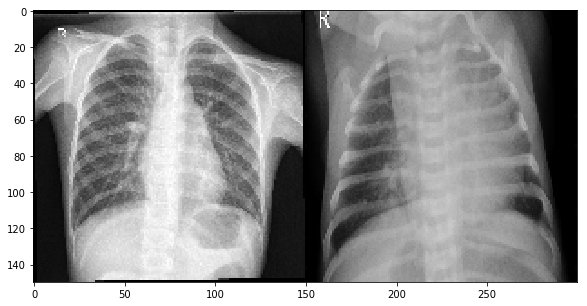

Normal - Pneumonia
-----------------------------------------------------------------------------------------------------------------------------------


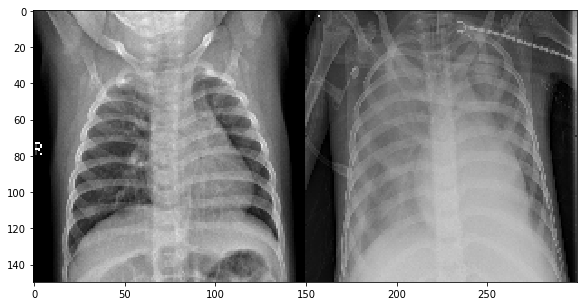

Normal - Pneumonia
-----------------------------------------------------------------------------------------------------------------------------------


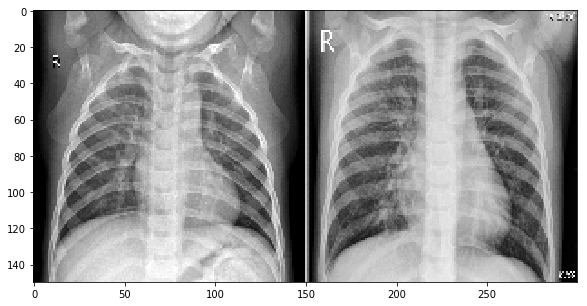

Normal - Pneumonia
-----------------------------------------------------------------------------------------------------------------------------------


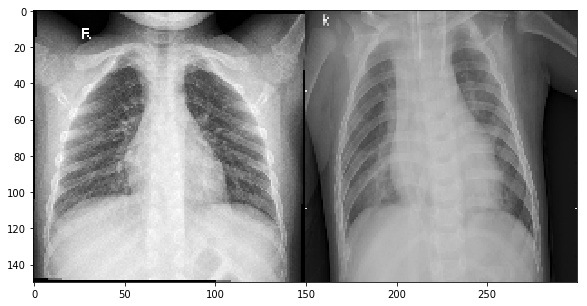

Normal - Pneumonia
-----------------------------------------------------------------------------------------------------------------------------------


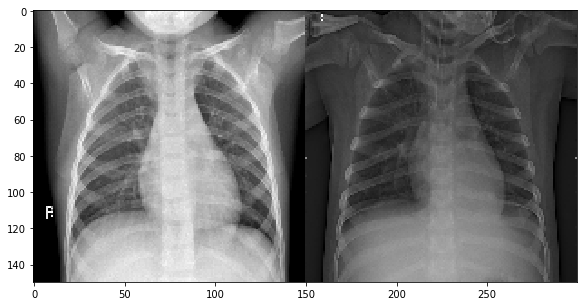

In [13]:
def plotter(i):
    imagep1 = cv2.imread(TRAIN_DIR+"PNEUMONIA/"+Pimages[i])
    imagep1 = skimage.transform.resize(imagep1, (150, 150, 3) , mode = 'reflect')
    imagen1 = cv2.imread(TRAIN_DIR+"NORMAL/"+Nimages[i])
    imagen1 = skimage.transform.resize(imagen1, (150, 150, 3))
    pair = np.concatenate((imagen1, imagep1), axis=1)
    print("Normal - Pneumonia")
    print("-----------------------------------------------------------------------------------------------------------------------------------")
    plt.figure(figsize=(10,5))
    plt.imshow(pair)
    plt.show()
for i in range(0,5):
    plotter(i)

In [17]:
def random_mini_batches(X, Y, mini_batch_size, seed, num_examples):

    np.random.seed(seed)           
    m = num_examples       
    mini_batches = []
        
    
    shuffled_X, shuffled_Y = shuffle(X, Y, random_state=0)

    
    num_complete_minibatches = math.floor(m/mini_batch_size) 
    for k in range(0, num_complete_minibatches):
        
        mini_batch_X = shuffled_X[k * mini_batch_size:(k + 1) * mini_batch_size, :, :, :]
        mini_batch_Y = shuffled_Y[k * mini_batch_size:(k + 1) * mini_batch_size, :]
        
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    
    if m % mini_batch_size != 0:
        
        end = m - mini_batch_size * math.floor(m / mini_batch_size)
        mini_batch_X = shuffled_X[:,num_complete_minibatches * mini_batch_size:]
        mini_batch_Y = shuffled_Y[:,num_complete_minibatches * mini_batch_size:]
        
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
        num_complete_minibatches += 1
    
    return mini_batches, num_complete_minibatches

In [18]:
def reshape_images(images_test):
    
    
    newImages = []

    for image in images_test:
            newImage = skimage.transform.resize(image, (128, 128, 3), mode="constant")
            newImages.append(newImage)
    
    return(np.asarray(newImages))

In [21]:
np.random.seed(123)           
X_train, y_train = shuffle(X_train, y_train, random_state=0)
X_test, y_test = shuffle(X_test, y_test, random_state=0)

In [22]:
X_train_1 = X_train[:, :, :, :]
y_train_1 = y_train[:, :]

X_test_1 = X_test[:, :, :, :]
y_test_1 = y_test[:, :]


In [23]:
X_train_1 = reshape_images(X_train_1)
X_test_1 = reshape_images(X_test_1)

In [24]:
print(X_train_1.shape, y_train_1.shape)
print(X_test_1.shape, y_test_1.shape)

(5216, 128, 128, 3) (5216, 2)
(624, 128, 128, 3) (624, 2)


In [26]:
X_train_1 = X_train_1.astype('float32')
y_train_1 = y_train_1.astype('float32')

X_test_1 = X_test_1.astype('float32')
y_test_1 = y_test_1.astype('float32')

In [27]:
x = tf.placeholder(tf.float32, shape=[None, 128, 128, 3])
y_ = tf.placeholder(tf.float32, shape=[None, 2])

In [28]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.5, name="Weights")
    return tf.Variable(initial)


def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape, name="bias")
    return tf.Variable(initial)


def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding="SAME", use_cudnn_on_gpu=True, data_format='NHWC')


def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="SAME")

In [29]:
x_image = tf.reshape(x, shape=[-1, 128, 128, 3])

W_conv1 = weight_variable([3, 3, 3, 16])
b_conv1 = bias_variable([16])

h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)  ## 64x64

W_conv2 = weight_variable([3, 3, 16, 32])
b_conv2 = bias_variable([32])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2) ## 32x32

W_conv3 = weight_variable([3, 3, 32, 64])
b_conv3 = bias_variable([64])

h_conv3 = tf.nn.relu(conv2d(h_pool2, W_conv3) + b_conv3)
h_pool3 = max_pool_2x2(h_conv3) ## 16x16

W_conv4 = weight_variable([3, 3, 64, 96])
b_conv4 = bias_variable([96]) 

h_conv4 = tf.nn.relu(conv2d(h_pool3, W_conv4) + b_conv4)
h_pool4 = max_pool_2x2(h_conv4) ## 8x8



W_fc1 = weight_variable([8 * 8 * 96, 1024])
b_fc1 = weight_variable([1024])

h_pool2_flat = tf.reshape(h_pool4, [-1, 8 * 8 * 96])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

W_fc2 = weight_variable([1024, 2])
b_fc2 = bias_variable([2])

y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

In [30]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_conv))
train_step = tf.train.AdamOptimizer(1e-5).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [31]:
mini_batch_size = 16

In [32]:
%%time
with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
    print("Inicializacion completa")
    
    train_history = []
    test_history = []
    
    
    
    for i in range(30):      ## epochs
        
        
        batches_train, num_batches_train = random_mini_batches(X_train_1, y_train_1
                              , mini_batch_size = mini_batch_size, seed = 123, num_examples = 5216)
        
        train_accuracy = 0
        
        for k in range(num_batches_train-1): ## Loop por todos los batches
            
            alpha = batches_train[k][0]
            beta = batches_train[k][1]
        
            train_step.run(feed_dict={x: alpha, y_: beta, keep_prob: 0.5})
            
            train_accuracy+= accuracy.eval(feed_dict={x: alpha, y_: beta, keep_prob: 1.0})
        

        
        batches_test, num_batches_test = random_mini_batches(X_test_1,
                                                         y_test_1, 
                                                         mini_batch_size = mini_batch_size, seed = 123, num_examples = 624)
        
        
                
        test_accuracy = 0
                
        for j in range(num_batches_test-1):

              test_accuracy+= accuracy.eval(feed_dict={x: batches_test[j][0], y_: batches_test[j][1], keep_prob: 1.0})
                    
        train_sum = (train_accuracy/num_batches_train)
        test_sum = (test_accuracy/num_batches_test)
                    
        train_history.append(train_sum)    
        test_history.append(test_sum)  
        
            
        print('step %d, training accuracy %g, test accuracy %g' % (i, train_sum, test_sum))
        
    predictions = y_conv.eval(feed_dict={x: X_test_1, keep_prob: 1.0})
    
    accuracy = accuracy.eval(feed_dict={x: X_test_1, y_: y_test_1, keep_prob: 1.0})
        
        

Inicializacion completa
step 0, training accuracy 0.740989, test accuracy 0.605769
step 1, training accuracy 0.741373, test accuracy 0.610577
step 2, training accuracy 0.75441, test accuracy 0.655449
step 3, training accuracy 0.789686, test accuracy 0.666667
step 4, training accuracy 0.825345, test accuracy 0.692308
step 5, training accuracy 0.849502, test accuracy 0.698718
step 6, training accuracy 0.866564, test accuracy 0.700321
step 7, training accuracy 0.876534, test accuracy 0.754808
step 8, training accuracy 0.889954, test accuracy 0.75
step 9, training accuracy 0.895322, test accuracy 0.75
step 10, training accuracy 0.900307, test accuracy 0.738782
step 11, training accuracy 0.906633, test accuracy 0.761218
step 12, training accuracy 0.912193, test accuracy 0.753205
step 13, training accuracy 0.91737, test accuracy 0.761218
step 14, training accuracy 0.920245, test accuracy 0.751603
step 15, training accuracy 0.926189, test accuracy 0.746795
step 16, training accuracy 0.930023,

## Precisión de Clasificación

In [34]:
accuracy

0.78044873

## Matriz de Confusiones

Obtención de Softmax de útima capa.

In [35]:
predictions.shape

(624, 2)

In [36]:
def softmax(x):
    
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

In [41]:
new_preds = []

for i in range(624):
    alpha = softmax(predictions[i])
    
    new_preds.append(alpha)
    
new_preds = np.asarray(new_preds)    

In [48]:
y_test_1 = y_test_1.tolist()

new_test_1 = []

for i in range(624):
    
    if y_test_1[i] == [0.0, 1.0]:
        new_test_1.append(1)
    else: new_test_1.append(0)

In [60]:
new_preds = new_preds.tolist()

preds = []

for i in range(624):
    
    if new_preds[i] == [0.0, 1.0]:
        preds.append(1)
    else: preds.append(0)

In [62]:
confusion_matrix(new_test_1, preds)

array([[104, 130],
       [  6, 384]])

## Gráficos de Entrenamiento

In [63]:
epochs = []
for i in range(30):
    epochs.append(i)
    

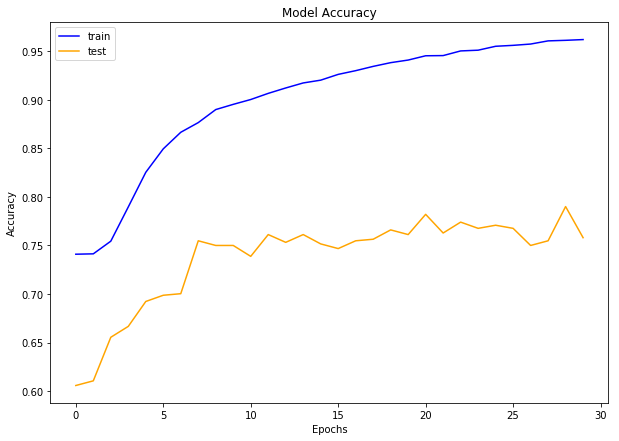

<Figure size 432x288 with 0 Axes>

In [64]:
plt.figure(figsize=(10,7))

plt.plot(epochs, train_history, color='blue')
plt.plot(epochs, test_history, color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.savefig("DenseCNN_accuracy.png")

In [65]:
train_history_lost = []
for i in train_history:
    train_history_lost.append(1-i)
    
test_history_lost = []
for i in test_history:
    test_history_lost.append(1-i)

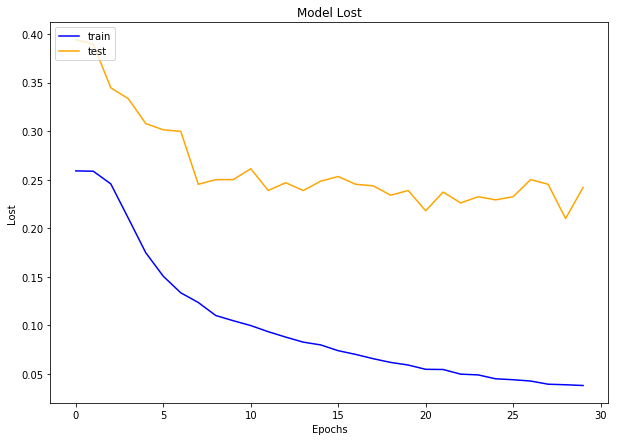

In [66]:
plt.figure(figsize=(10,7))

plt.plot(epochs, train_history_lost, color='blue')
plt.plot(epochs, test_history_lost, color='orange')
plt.xlabel('Epochs')
plt.ylabel('Lost')
plt.title('Model Lost')
plt.legend(['train', 'test'], loc='upper left')
plt.show()